## Generate Data

In [65]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

dim = 2
n_centers = 20
n_classes = 2 # 0 or 1
n_centers_per_class = n_centers // n_classes
variance = 1/5
std_dev = np.sqrt(variance)

x_means = np.random.normal(0, std_dev, n_centers)  # Means for x coordinates
y_means = np.random.normal(0, std_dev, n_centers)  # Means for y coordinates

centers = np.array(list(zip(x_means, y_means)))
centers = centers.reshape(n_classes,n_centers_per_class,dim)
print(centers)

[[[ 0.59550359 -0.88446698]
  [ 0.31988248 -0.77965979]
  [-0.69112402  0.11899019]
  [-0.00374937  1.06658982]
  [ 0.27786989  0.50253001]
  [-0.32203205  0.74801939]
  [ 0.11874039  0.04434088]
  [ 0.04854438  0.62520299]
  [ 0.00191919 -0.12130579]
  [-0.07808359  0.27423325]]

 [[ 0.1936552  -0.11954788]
  [ 0.53801467 -0.24565846]
  [-0.43159049  0.05934895]
  [ 0.45985815 -0.21293718]
  [ 0.1022465   0.58516695]
  [ 0.19907159  0.08721259]
  [-0.50830396  0.17897935]
  [ 0.06043505 -0.15099377]
  [ 0.66390513  0.56191148]
  [-0.48290343 -0.32734671]]]


In [57]:
def generate_data_points(centers, n_samples, std_dev):
    data = []
    for center in centers:
        x_samples = np.random.normal(center[0], std_dev, n_samples)
        y_samples = np.random.normal(center[1], std_dev, n_samples)
        samples = np.column_stack((x_samples, y_samples))
        data.append(samples)
    return np.vstack(data)

def generate_data_matrices(centers, sample_size):
    n_classes = centers.shape[0]
    n_centers_per_class = centers.shape[1]
    n_samples_per_center = (sample_size // n_classes) // n_centers_per_class
    
    Xtrain = []
    Ytrain = []
    for target, class_centers in enumerate(centers):
        X = generate_data_points(class_centers, n_samples_per_center, std_dev)
        Y = [target] * X.shape[0]
        Xtrain.append(X)
        Ytrain.append(Y)
    
    Xtrain = np.vstack(Xtrain)
    Ytrain = np.concatenate(Ytrain)
    return Xtrain, Ytrain

Xtrain, Ytrain = generate_data_matrices(centers, 200)
Xtest, Ytest = generate_data_matrices(centers, 10000)

print(f"Xtrain: {Xtrain.shape}")
print(f"Ytrain: {Ytrain.shape}")
print(f"Xtest: {Xtest.shape}")
print(f"Ytest: {Ytest.shape}")

Xtrain: (200, 2)
Ytrain: (200,)
Xtest: (10000, 2)
Ytest: (10000,)


In [69]:
Xtrain[:100, :]
Xtrain.shape[0] // n_classes
centers[0,:,0]

array([ 0.59550359,  0.31988248, -0.69112402, -0.00374937,  0.27786989,
       -0.32203205,  0.11874039,  0.04854438,  0.00191919, -0.07808359])

ValueError: x and y must be the same size

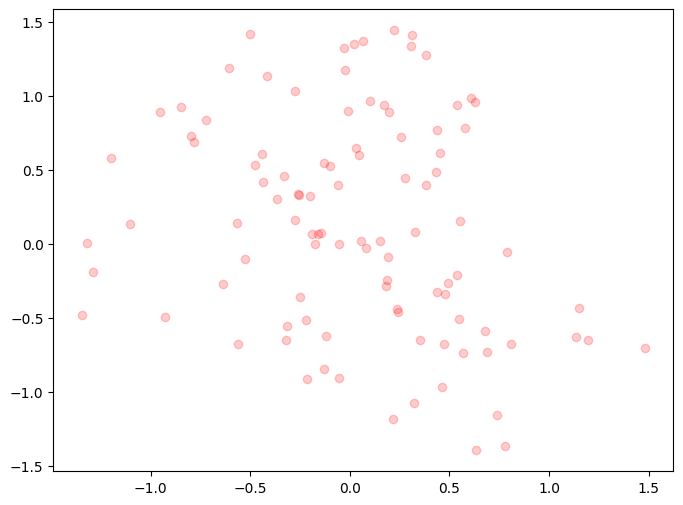

In [70]:
plt.figure(figsize=(8, 6))

n_samples_per_class = Xtrain.shape[0] // n_classes

plt.scatter(Xtrain[:n_samples_per_class, 0], Xtrain[:n_samples_per_class, 1], color='red', alpha=0.2, label='Class 1 Samples')
plt.scatter(Xtrain[n_samples_per_class:, 0], class_2_data[n_samples_per_class:, 1], color='blue', alpha=0.2, label='Class 2 Samples')

# Plot the centers with a '+' marker
plt.scatter(centers[0,:,0], centers[0,:,1], color='red', marker='+', s=200, label='Class 1 Centers')
plt.scatter(centers[1,:,0], centers[1,:,1], color='blue', marker='+', s=200, label='Class 2 Centers')

# Add legend and labels
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()
